In [53]:
# título
print("\033[1;34mTendências do Número de  Suicídios em Shandong\033[0m")


Tendências do Número de  Suicídios em Shandong


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
df = pd.read_csv('/content/shangdongSuicide.csv')
df.head()

,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [57]:
# Paragráfo

print("\033[1;34mTendências do Número de  Suicídios em Shandong\033[0m")

Tendências do Número de  Suicídios em Shandong


In [58]:
# Exibe informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2571 non-null   int64 
 1   Person_ID     2571 non-null   int64 
 2   Hospitalised  2571 non-null   object
 3   Died          2571 non-null   object
 4   Urban         2571 non-null   object
 5   Year          2571 non-null   int64 
 6   Month         2571 non-null   int64 
 7   Sex           2571 non-null   object
 8   Age           2571 non-null   int64 
 9   Education     2571 non-null   object
 10  Occupation    2571 non-null   object
 11  method        2571 non-null   object
dtypes: int64(5), object(7)
memory usage: 241.2+ KB


In [59]:
# Verifica a existência de valores nulos
df.isna().sum()

Unnamed: 0      0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
dtype: int64

In [60]:
# Exclui colunas desnecessárias
df.drop(['Unnamed: 0', 'Person_ID'], axis = 1, inplace = True)

In [61]:
#Contando os valores das colunas
print(df['Hospitalised'].value_counts())
print('-'*30)
print(df['Died'].value_counts())
print('-'*30)
print(df['Urban'].value_counts())
print('-'*30)
print(df['Education'].value_counts())
print('-'*30)
print(df['Occupation'].value_counts())
print('-'*30)
print(df['method'].value_counts())

yes    1553
no     1018
Name: Hospitalised, dtype: int64
------------------------------
no     1315
yes    1256
Name: Died, dtype: int64
------------------------------
no         2213
yes         277
unknown      81
Name: Urban, dtype: int64
------------------------------
Secondary    1280
primary       659
iliterate     533
unknown        80
Tertiary       19
Name: Education, dtype: int64
------------------------------
farming             2032
household            248
others/unknown       156
professional          37
student               35
unemployed            30
business/service      21
worker                 6
others                 3
retiree                3
Name: Occupation, dtype: int64
------------------------------
Pesticide        1768
Hanging           431
Other poison      146
Poison unspec     107
unspecified        48
Cutting            29
Drowning           26
Jumping            15
Others              1
Name: method, dtype: int64


In [62]:
# Média de idade por ano
dfGroupedAge = df.groupby('Year')['Age'].mean().round(0)
print(dfGroupedAge)

Year
2009    53.0
2010    53.0
2011    52.0
Name: Age, dtype: float64


In [63]:
# Média de maior indice em mês por ano
dfGroupedDeit = df.groupby('Year')['Month'].mean().round()
print(dfGroupedDeit)

Year
2009    6.0
2010    6.0
2011    6.0
Name: Month, dtype: float64


In [64]:
print("\033[1;34mPrimeiras Informações\033[0m")

Primeiras Informações


<ipython-input-65-6ebdc62d394b>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Age', bins=9, kde=False, palette='mako', color='#446791')


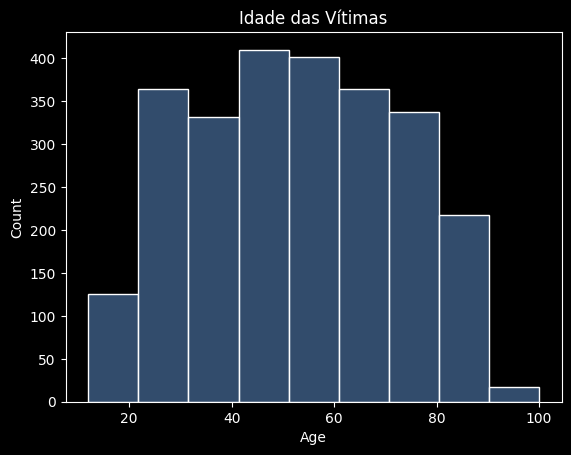

In [65]:
# Cria um histograma da idade das vítimas
plt.style.use('dark_background')
sns.histplot(data=df, x='Age', bins=9, kde=False, palette='mako', color='#446791')
plt.title('Idade das Vítimas')
plt.show()

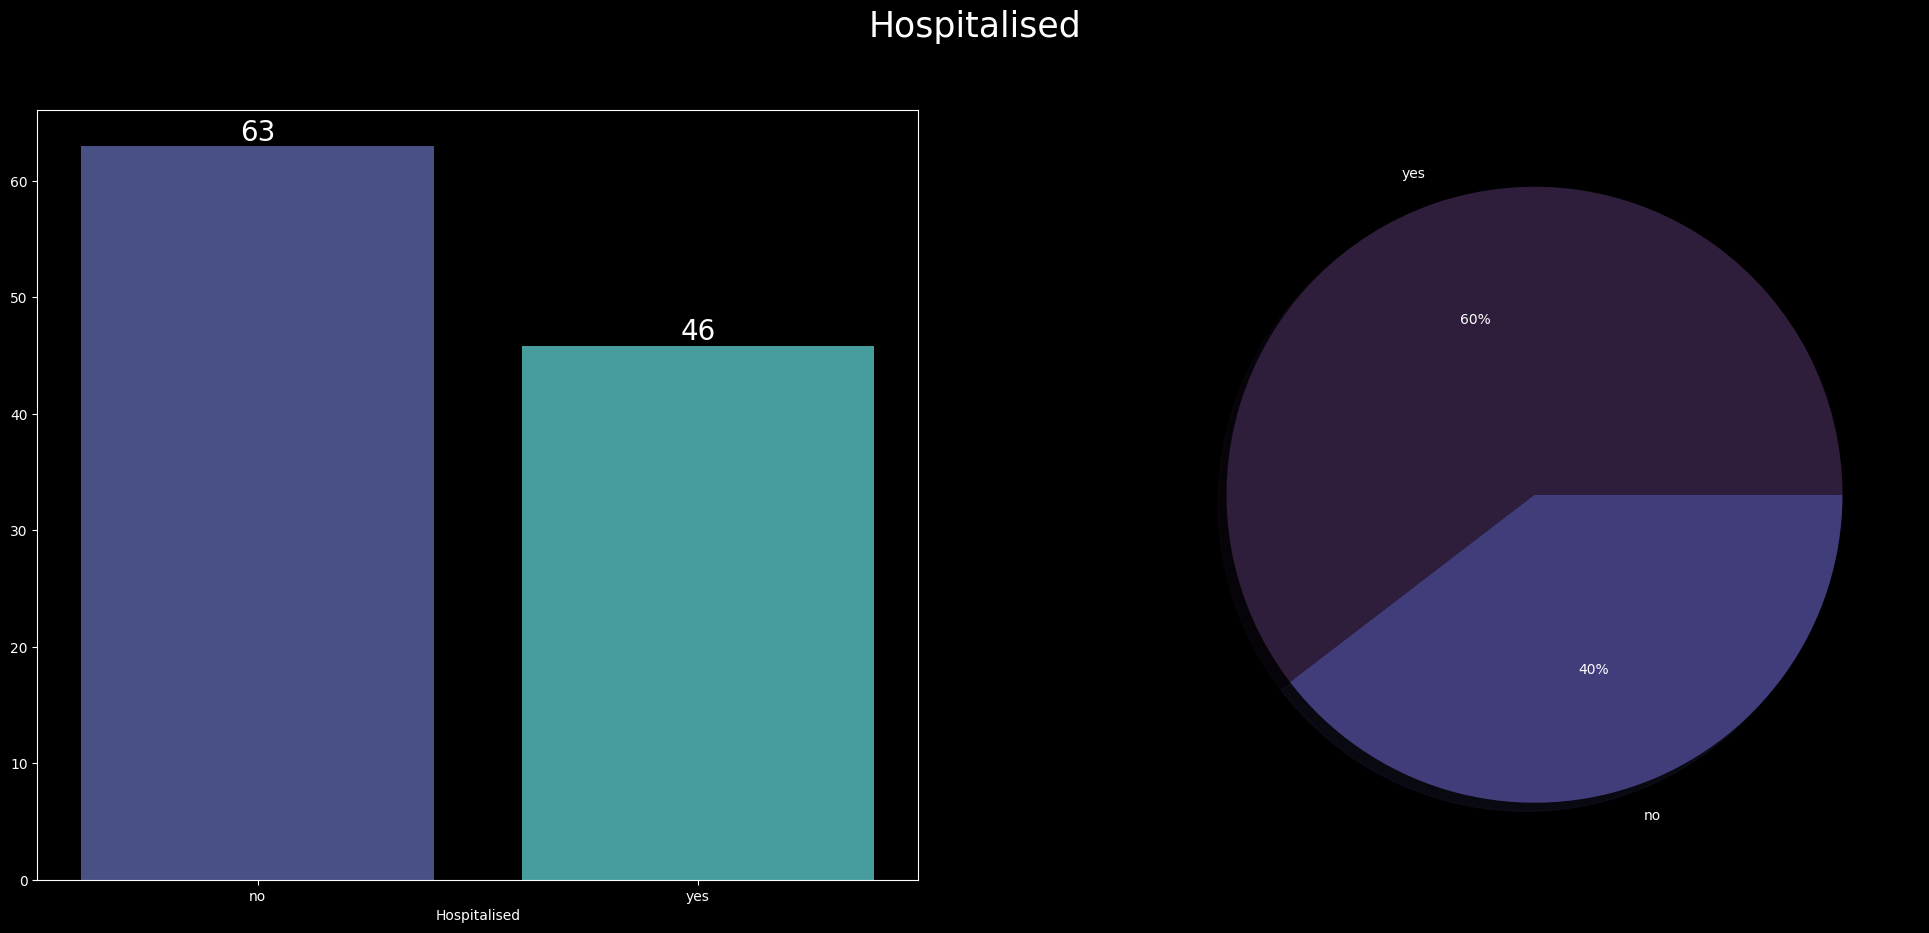

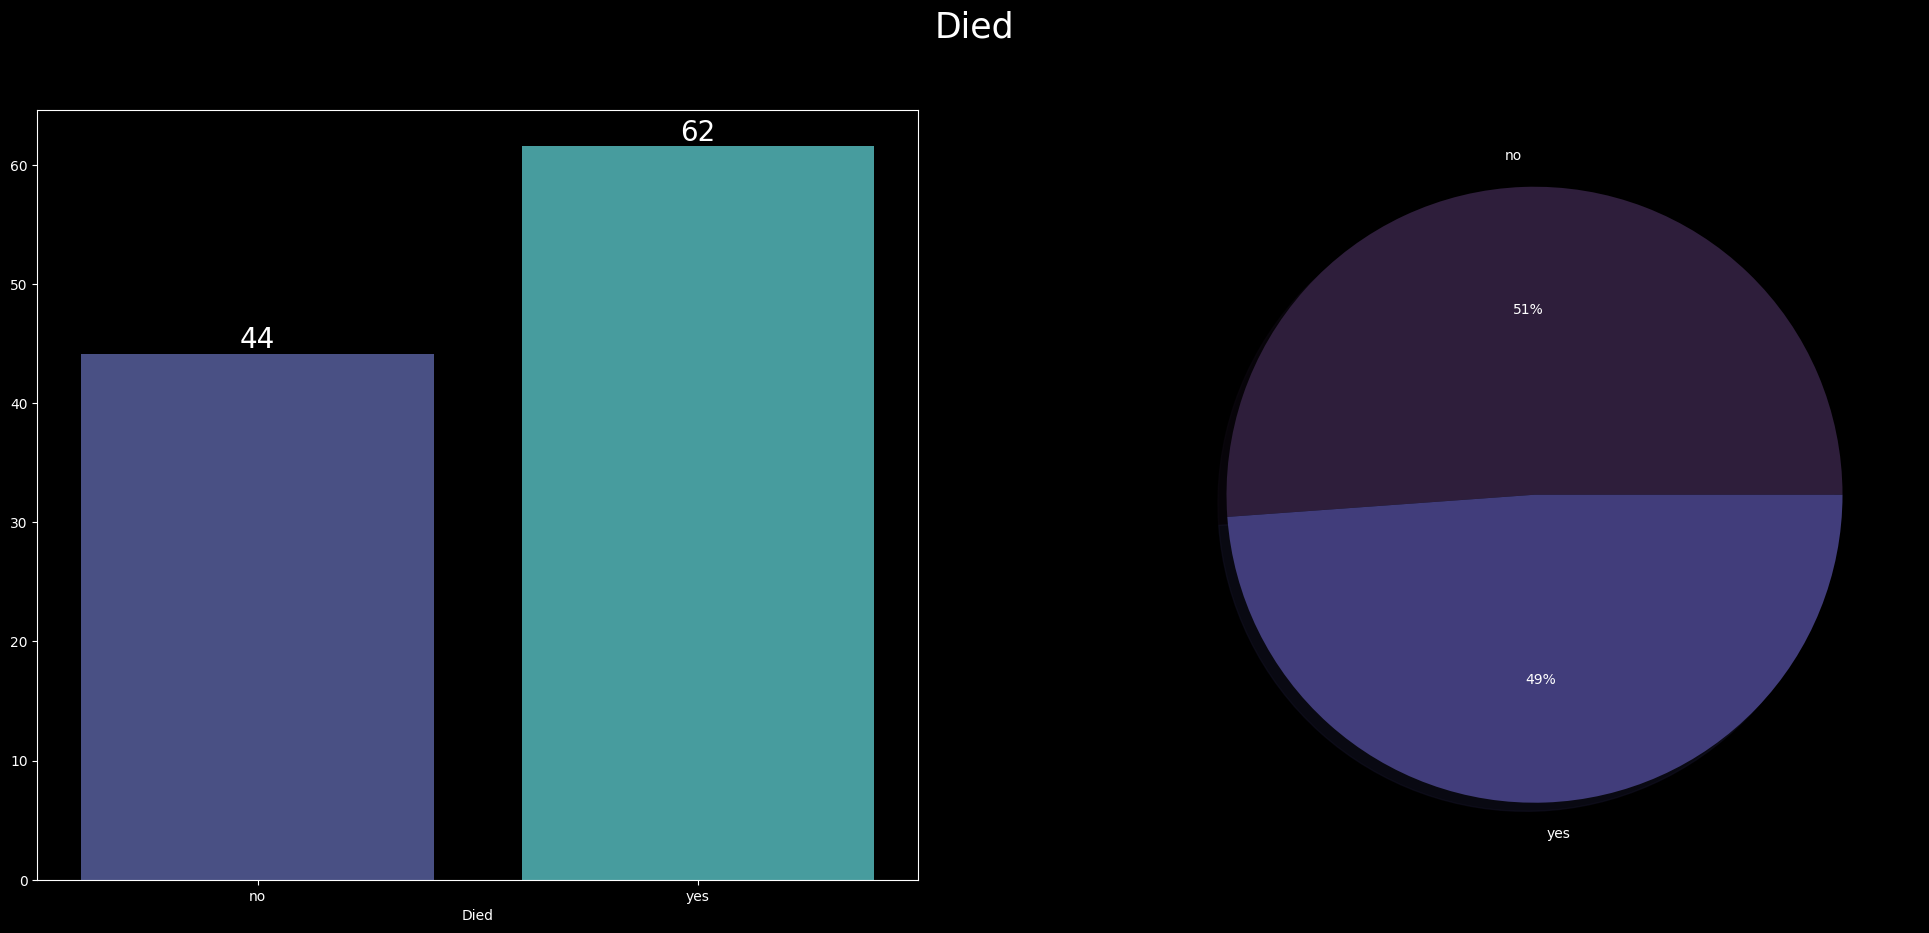

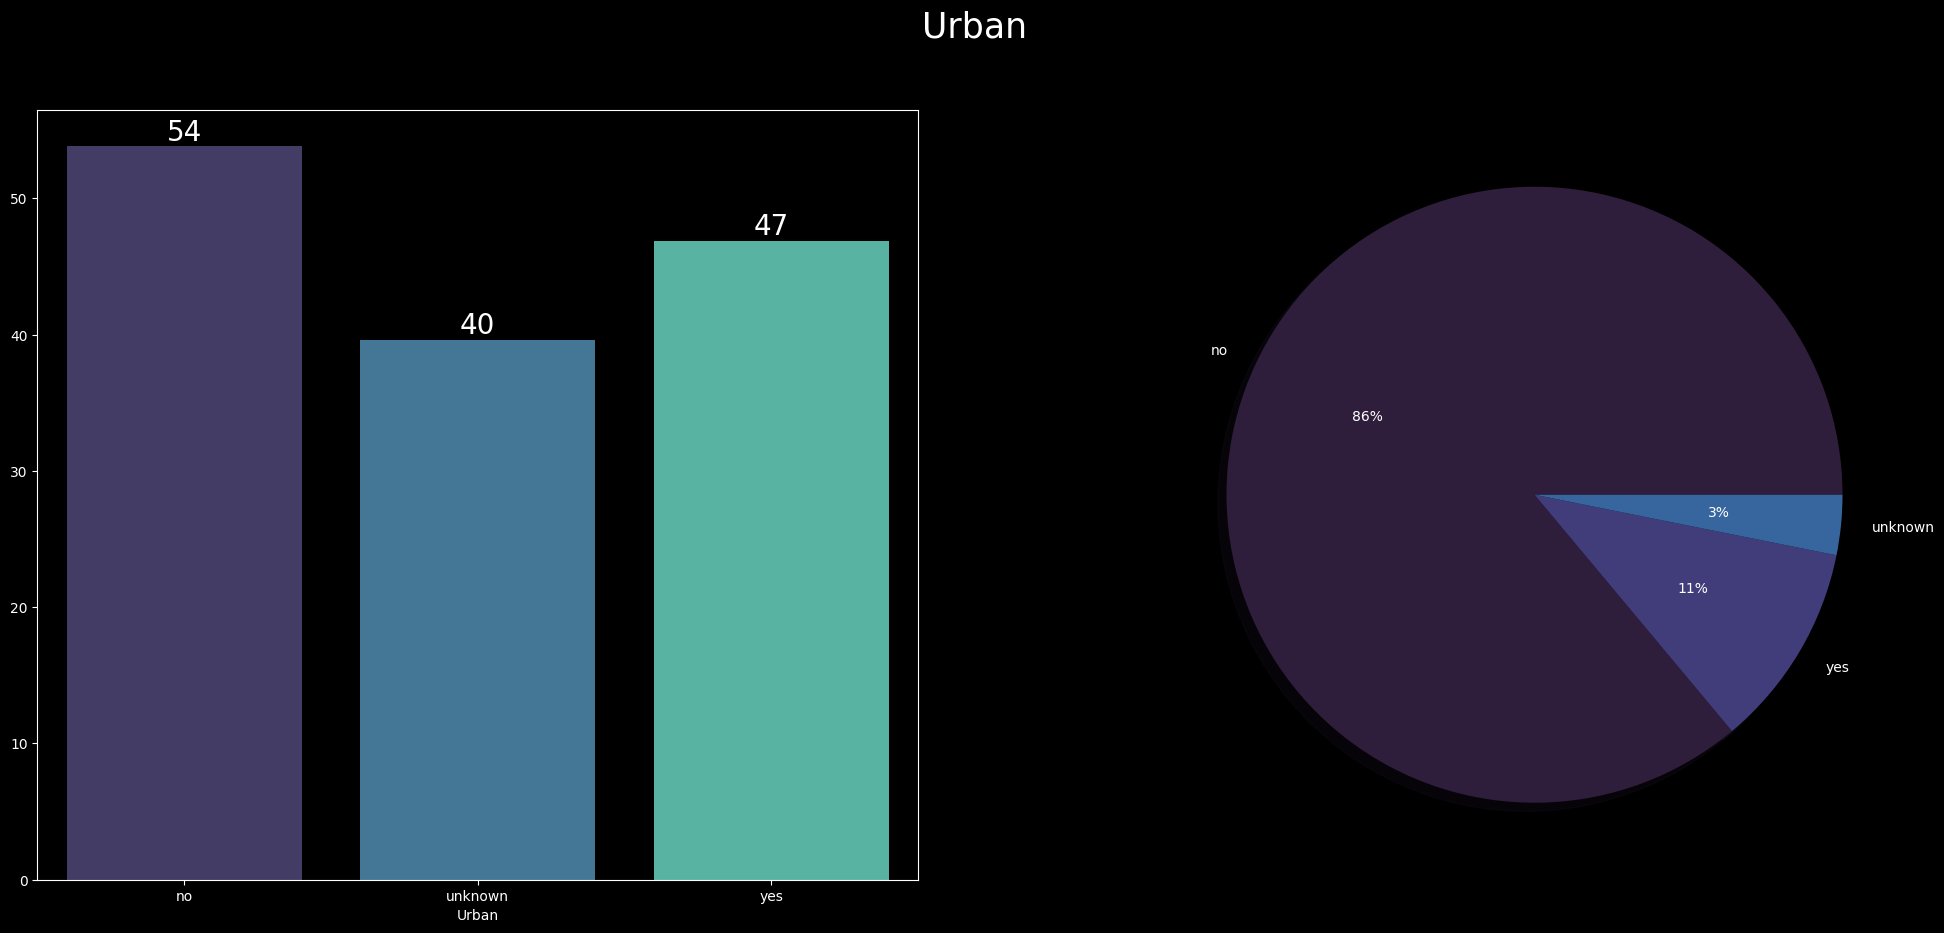

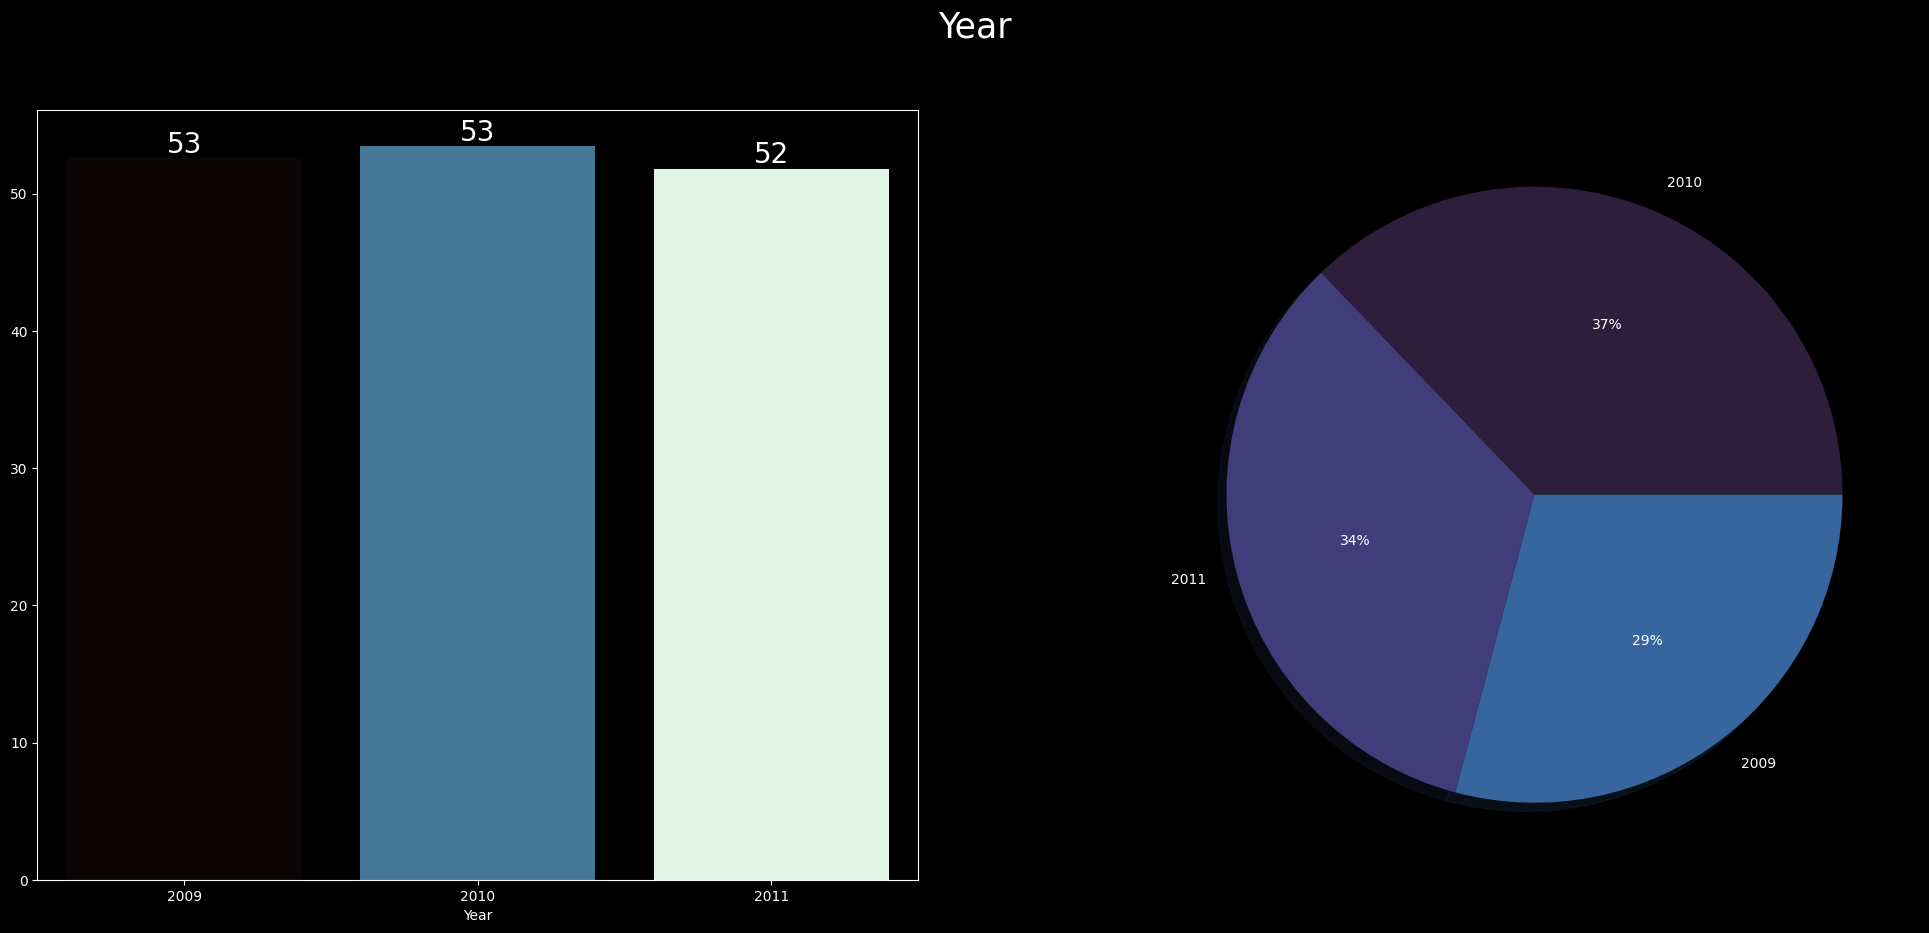

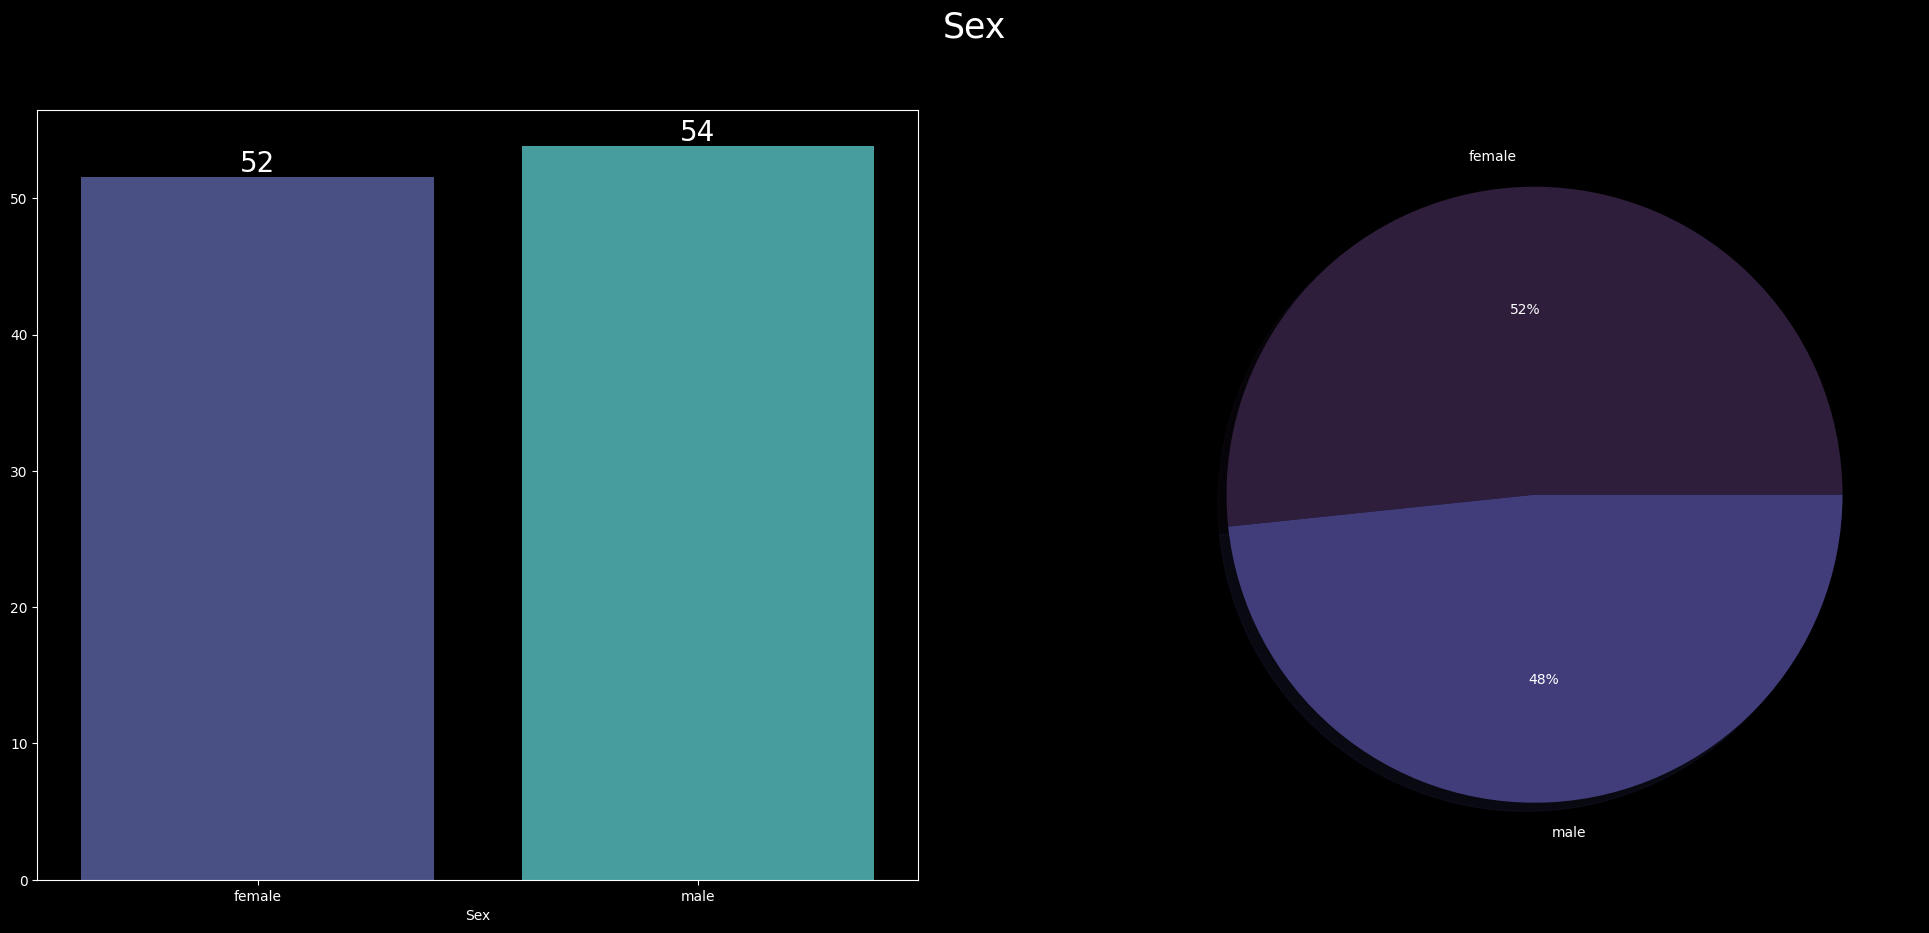

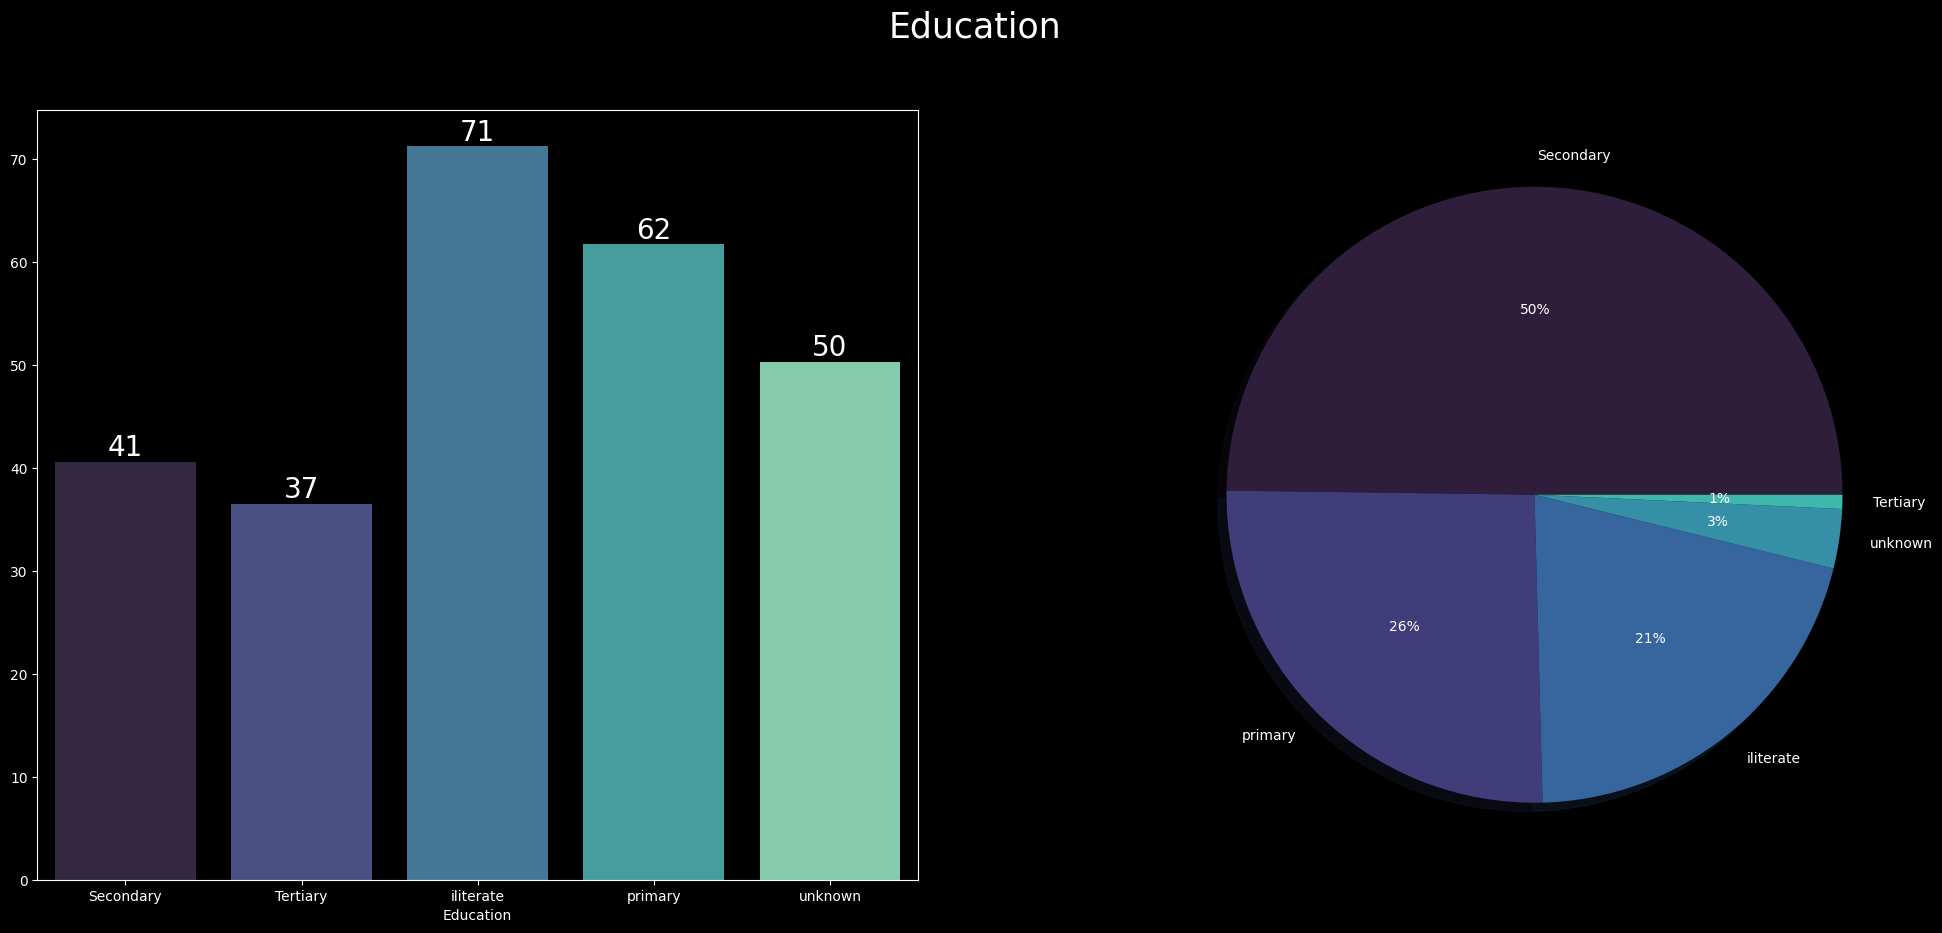

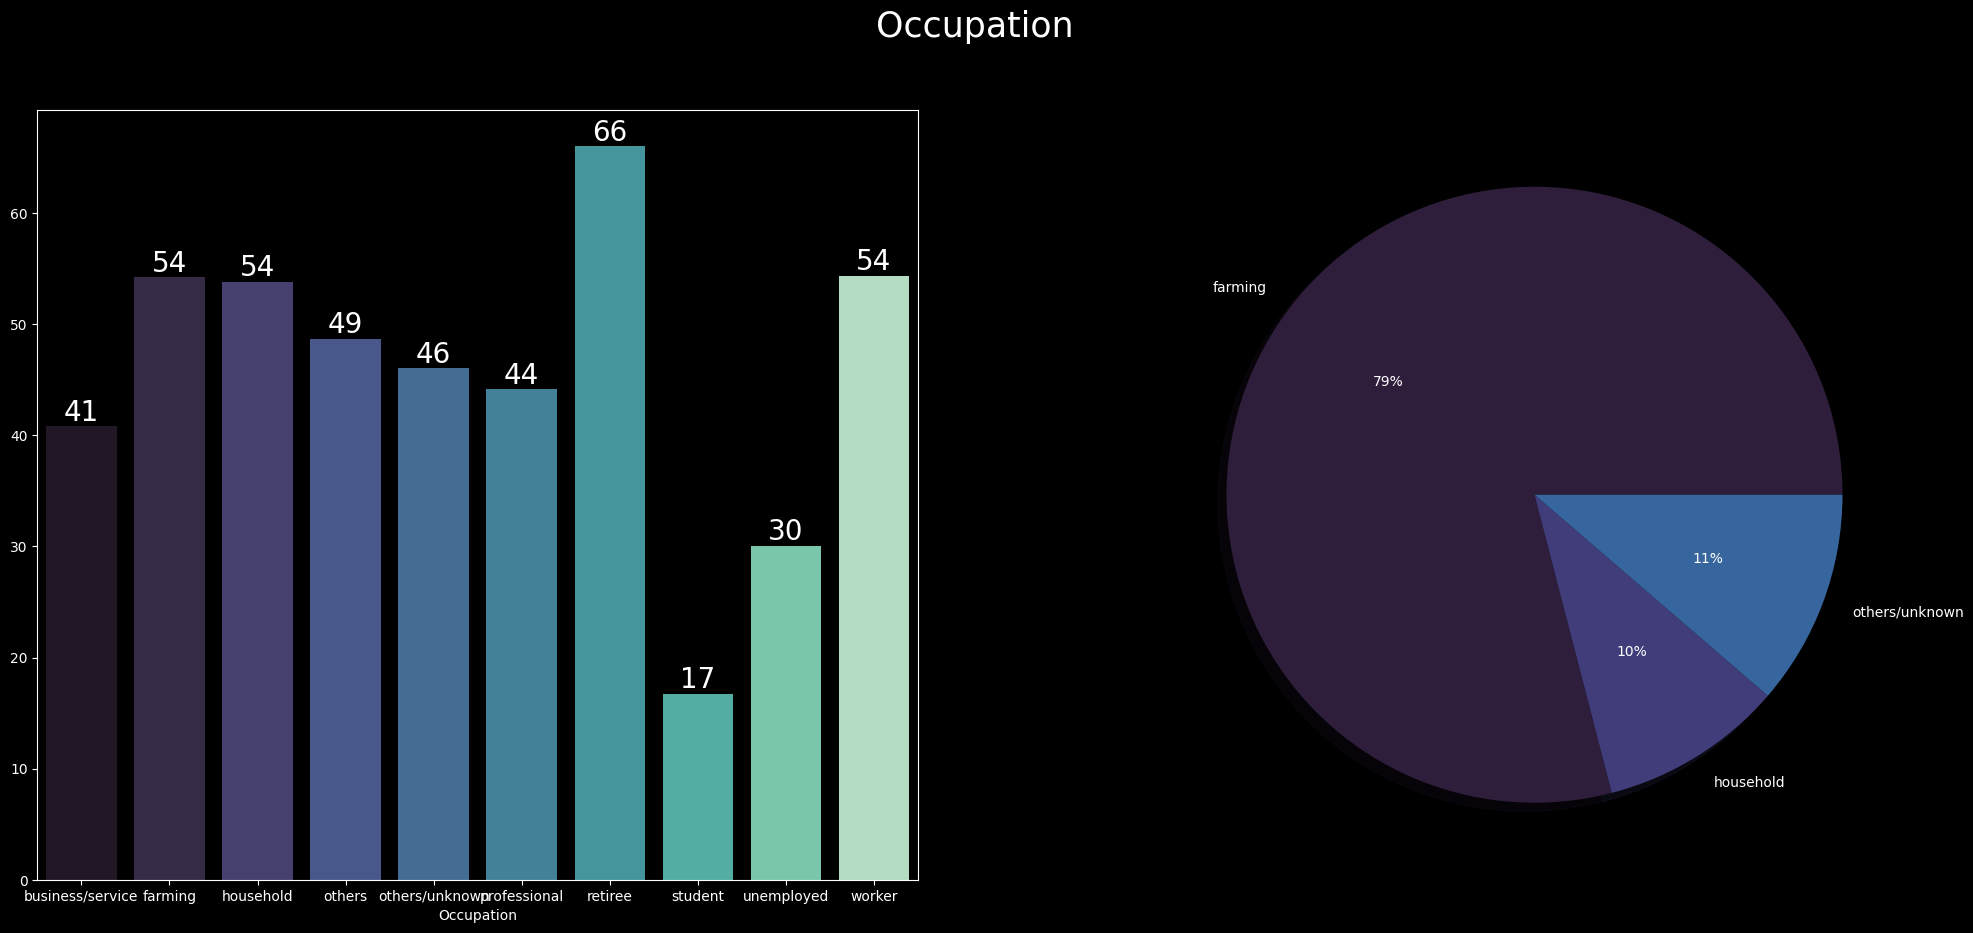

In [66]:
def plots(df, x):
    plt.style.use('dark_background')
    fig, ax = plt.subplots(1, 2, figsize=(25, 10))
    Group_data = df.groupby(x)

    sns.barplot(x=Group_data['Age'].mean().index,
                y=Group_data['Age'].mean().values,
                ax=ax[0],
                palette='mako',
                hue=Group_data['Age'].mean().index,
                legend=False)

    for container in ax[0].containers:
        ax[0].bar_label(container, color='white', size=20, fmt='%.0f')

    create_pie_chart(df, x, ax[1])

    plt.suptitle(x, fontsize=25)
    plt.show()

def create_pie_chart(df, x, ax):
    if x == 'Occupation':
        occupation_counts = df[x].value_counts()
        farming_count = occupation_counts.get('farming', 0)
        household_count = occupation_counts.get('household', 0)
        others_unknown_count = occupation_counts.sum() - farming_count - household_count
        occupation_counts_modified = [farming_count, household_count, others_unknown_count]
        occupation_labels_modified = ['farming', 'household', 'others/unknown']

        plt.pie(x=occupation_counts_modified,
                labels=occupation_labels_modified,
                autopct='%.0f%%',
                shadow=True,
                colors=sns.color_palette('mako'))
    else:
        plt.pie(x=df[x].value_counts(),
                labels=df[x].value_counts().index,
                autopct='%.0f%%',
                shadow=True,
                colors=sns.color_palette('mako'))

for i in df.columns:
    if i != 'Age' and i != 'method' and i != 'Month':
        plots(df, i)



<ipython-input-67-ee76372d8069>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, col].set_xticklabels(year_labels)


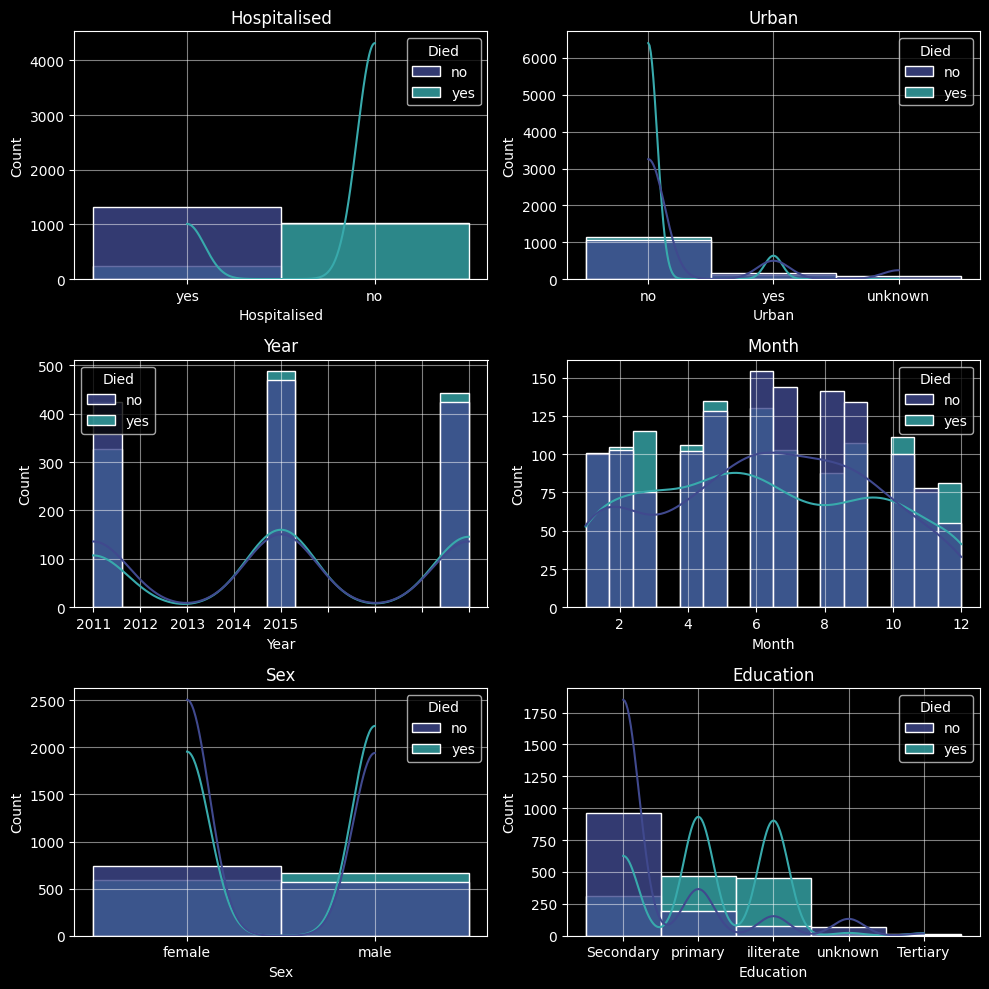

In [67]:
# Define o estilo de fundo escuro para os gráficos
plt.style.use('dark_background')

# Calcula o número de linhas e colunas para organizar os subplots
num_cols = 2
num_rows = (len(df.columns) - 4) // num_cols + ((len(df.columns) - 4) % num_cols > 0)

# Cria a figura e os subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Índice do subplot atual
subplot_index = 0

# Percorre as colunas do dataframe
for i, feature in enumerate(df.columns):
    # Ignora as colunas 'Age', 'method', 'Occupation' e 'Died'
    if feature not in ['Age', 'method', 'Occupation', 'Died']:
        # Calcula a linha e coluna atual do subplot
        row = subplot_index // num_cols
        col = subplot_index % num_cols

        # Configurações específicas para a coluna 'Year'
        if feature == 'Year':
            year_labels = ['2010', '2011', '2012', '2013', '2014', '2015']  # Define os rótulos desejados para os anos

            # Cria um histograma com densidade (kde) e colorido por 'Died'
            sns.histplot(data=df, x=feature, kde=True, palette='mako', hue='Died', alpha=0.8, ax=axs[row, col])

            # Define o título do subplot
            axs[row, col].set_title(feature)

            # Define os rótulos dos anos
            axs[row, col].set_xticklabels(year_labels)
        else:
            # Cria um histograma com densidade (kde) e colorido por 'Died'
            sns.histplot(data=df, x=feature, kde=True, palette='mako', hue='Died', alpha=0.8, ax=axs[row, col])

            # Define o título do subplot
            axs[row, col].set_title(feature)

        # Adiciona uma grade ao subplot
        axs[row, col].grid(alpha=0.5)

        # Atualiza o índice do subplot
        subplot_index += 1

# Ajusta o espaçamento entre os subplots
plt.tight_layout()

# Exibe os subplots
plt.show()


<ipython-input-50-f38e83b88b17>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Died', y='Month', data=df, palette='mako')


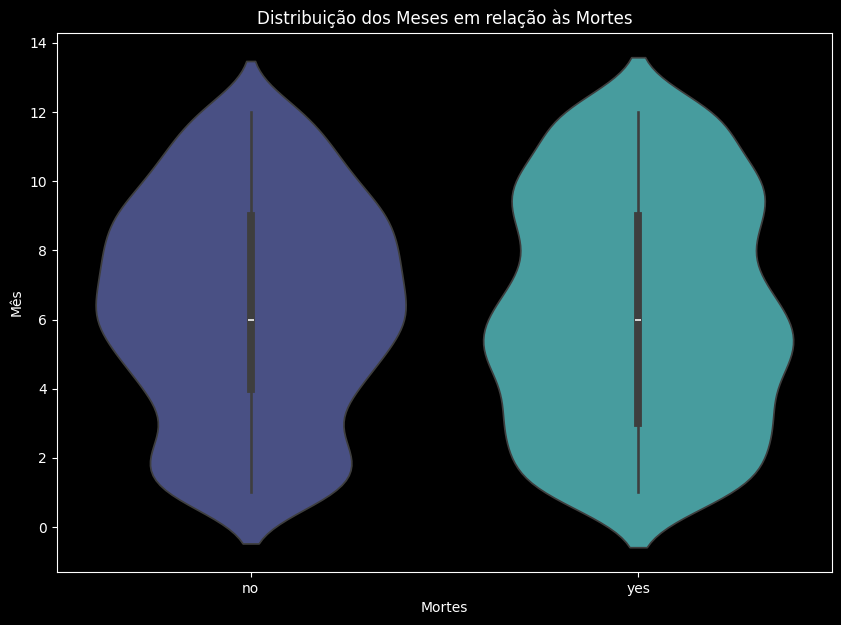

In [50]:
plt.figure(figsize=(10, 7))
plt.style.use('dark_background')

# Gráfico de violin plot
sns.violinplot(x='Died', y='Month', data=df, palette='mako')

# Título e rótulos dos eixos
plt.title('Distribuição dos Meses em relação às Mortes')
plt.xlabel('Mortes')
plt.ylabel('Mês')

plt.show()


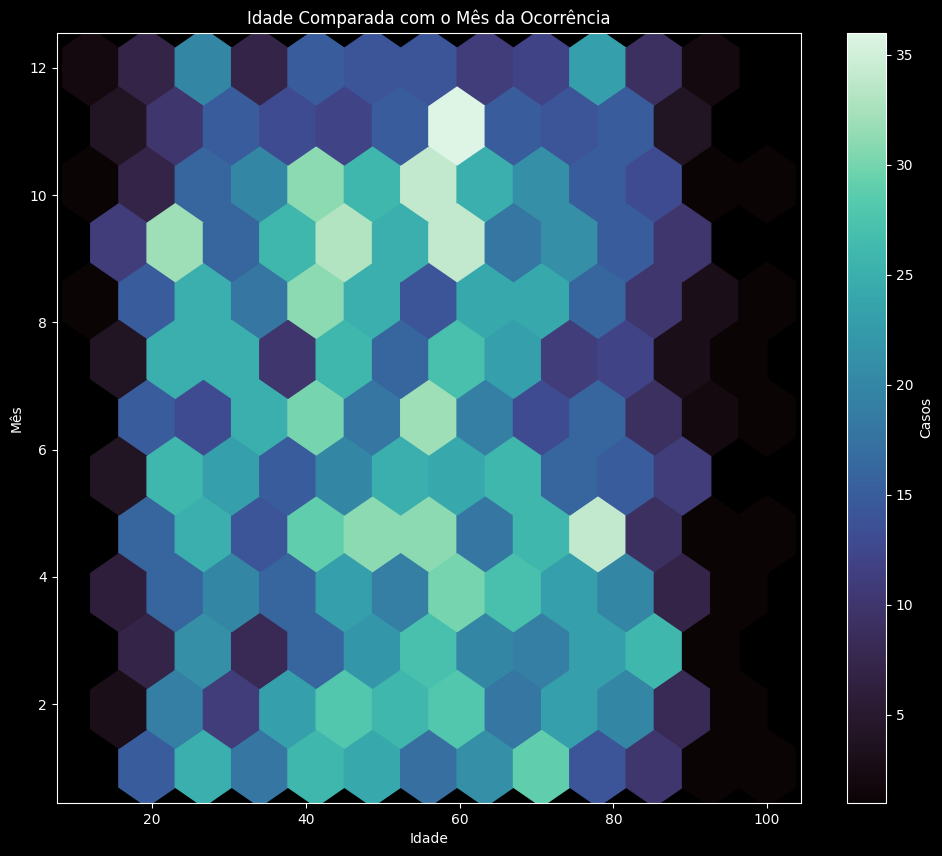

In [51]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 10))

# Gráfico de hexbin plot
plt.hexbin(df['Age'], df['Month'], gridsize=12, cmap='mako', mincnt=1)

# Barra de cores e rótulos dos eixos
plt.colorbar(label='Casos')
plt.xlabel('Idade')
plt.ylabel('Mês')

# Título do gráfico
plt.title('Idade Comparada com o Mês da Ocorrência')

plt.show()

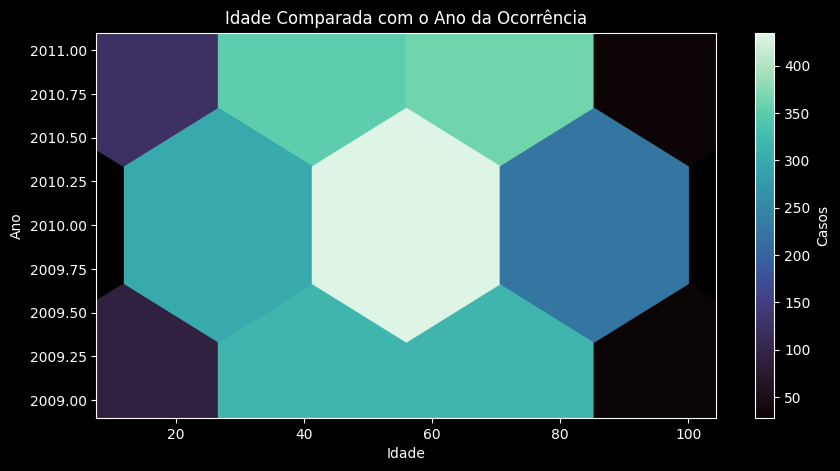

In [52]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))

# Gráfico de hexbin plot
plt.hexbin(df['Age'], df['Year'], gridsize=3, cmap='mako', mincnt=1)

# Barra de cores e rótulos dos eixos
plt.colorbar(label='Casos')
plt.xlabel('Idade')
plt.ylabel('Ano')

# Título do gráfico
plt.title('Idade Comparada com o Ano da Ocorrência')

plt.show()